In [3]:
# Step 1: Load Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset
file_path = '/media/sina/Sina/Yandex_sync/Academia/sci_codes/python/Kaggle/Bank_Marketing_Dataset/data/bank.csv'
data = pd.read_csv(file_path)



In [4]:
# Step 3: Clean and map target column
data['deposit'] = data['deposit'].str.strip().str.lower()
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

print("Cleaned target values:\n", data['deposit'].value_counts())

Cleaned target values:
 deposit
0    5873
1    5289
Name: count, dtype: int64


In [5]:
# Step 4: Basic Info
print("\nDataset Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB
None

Statistical Summary:
                age       balance           day      durat

In [6]:
# Step 5: Encode Categorical Features (FIXED)
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [7]:
# Step 6: Scale Numerical Features
numerical_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [8]:
# Step 7: Train-Test Split
X = data_encoded.drop('deposit', axis=1)
y = data_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain/Test split completed.")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train/Test split completed.
Training samples: 8929, Test samples: 2233


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 8: Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict on the test set using Logistic Regression
y_pred = model.predict(X_test)

# Step 10: Evaluate Logistic Regression model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix:
[[999 176]
 [215 843]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1175
           1       0.83      0.80      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233


Accuracy: 0.8249


/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
model = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Step 11: Predict and evaluate with tuned Logistic Regression (liblinear)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")



Confusion Matrix:
[[997 178]
 [208 850]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1175
           1       0.83      0.80      0.81      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233


Accuracy: 0.8271


In [11]:
# Step 12: Cross-validation score for Logistic Regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


CV Accuracy: 0.7858 ± 0.0337


In [12]:
# Step 13: Cross-validation score for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")


Random Forest CV Accuracy: 0.8033 ± 0.0520


In [13]:
# Step 14: Feature importance from Random Forest
rf_model.fit(X_train, y_train)
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

duration            0.336915
balance             0.084862
age                 0.078115
day                 0.071954
campaign            0.036640
contact_unknown     0.036204
pdays               0.034471
poutcome_success    0.034227
housing_yes         0.026135
previous            0.018556
dtype: float64


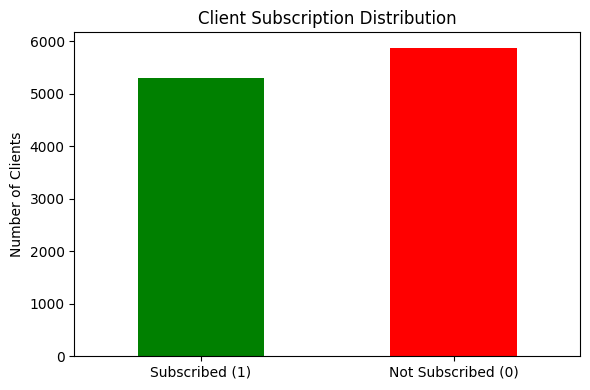

In [14]:
import matplotlib.pyplot as plt

# Data
subscribed = 5289
not_subscribed = 5873
subscription_counts = pd.Series({
    'Subscribed (1)': subscribed,
    'Not Subscribed (0)': not_subscribed
})

# Plot
plt.figure(figsize=(6, 4))
subscription_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Client Subscription Distribution')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plot_subscription_distribution.png")
plt.show()


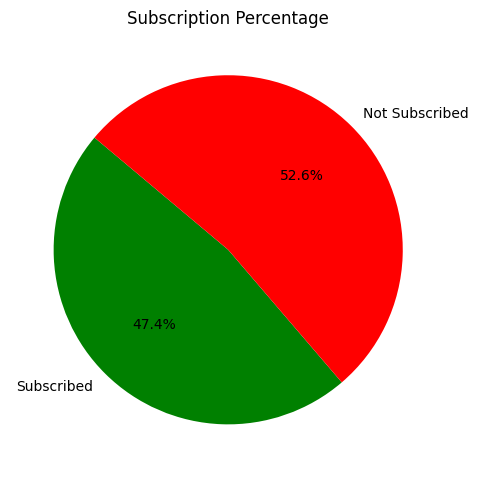

In [15]:
# Data
sizes = [subscribed, not_subscribed]
labels = ['Subscribed', 'Not Subscribed']
colors = ['green', 'red']

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Subscription Percentage')
plt.tight_layout()
plt.savefig("plot_subscription_pie.png")
plt.show()


/tmp/ipykernel_15421/137206574.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


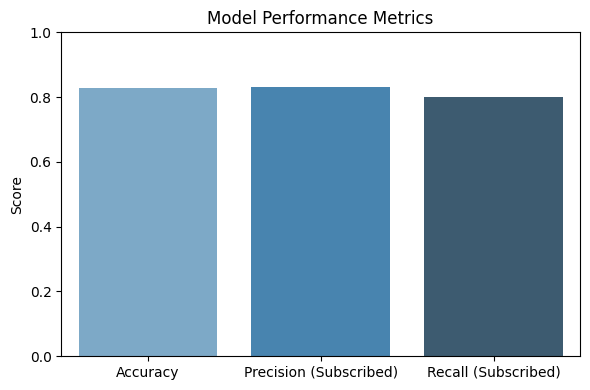

In [16]:
import seaborn as sns

# Metrics
model_accuracy = 0.8271
precision_1 = 0.83
recall_1 = 0.80

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=['Accuracy', 'Precision (Subscribed)', 'Recall (Subscribed)'],
    y=[model_accuracy, precision_1, recall_1],
    palette='Blues_d'
)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.tight_layout()
plt.savefig("plot_model_metrics.png")
plt.show()


In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming `data_encoded` is your processed dataset
# and `deposit` is the binary target column

# Step 15: Find correlation with target
correlation = data_encoded.corr()['deposit'].drop('deposit').abs().sort_values(ascending=False)
most_correlated_feature = correlation.idxmax()
print(f"Most correlated feature: {most_correlated_feature} (Correlation: {correlation.max():.4f})")

# Step 16: Prepare single-feature dataset
X_single = data_encoded[[most_correlated_feature]]
y = data_encoded['deposit']

# Step 17: Train/Test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_single, y, test_size=0.2, random_state=42, stratify=y
)

# Step 18: Train logistic regression model
single_feature_model = LogisticRegression(max_iter=1000)
single_feature_model.fit(X_train_s, y_train_s)

# Step 19: Evaluate model
y_pred_s = single_feature_model.predict(X_test_s)
accuracy_s = accuracy_score(y_test_s, y_pred_s)

print("\nSingle Feature Model Performance:")
print(f"Feature Used: {most_correlated_feature}")
print(f"Accuracy: {accuracy_s:.4f}")
print(classification_report(y_test_s, y_pred_s))


Most correlated feature: duration (Correlation: 0.4519)

Single Feature Model Performance:
Feature Used: duration
Accuracy: 0.7179
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1175
           1       0.76      0.59      0.66      1058

    accuracy                           0.72      2233
   macro avg       0.73      0.71      0.71      2233
weighted avg       0.73      0.72      0.71      2233

